In [1]:
import pandas as pd
import sys
import os
sys.path.append('/home/greg/GitHub/')
import pyEDIutils.search as edi
import datetime
now = datetime.datetime.now().strftime("%Y%m%d")

In [8]:
import importlib
importlib.reload(edi)
importlib.reload(edi.rq)
df = edi.search_pasta(fields=['packageid','title','pubdate','author',
                                   'begindate','enddate','doi'])
df.head()

https://pasta.lternet.edu/package/search/eml?defType=edismax&q=%2A&fq=scope%3Aknb-lter-jrn&fl=packageid%2Ctitle%2Cpubdate%2Cauthor%2Cbegindate%2Cenddate%2Cdoi&sort=packageid%2Casc&rows=500


,packageid,title,pubdate,authors,begindate,enddate,doi
0,knb-lter-jrn.100.3,High resolution shrub cover raster maps of the...,2020,"Ji, Wenjie;Hanan, Niall P.",2011-01-01,2011-12-31,doi:10.6073/pasta/313fec8669bc7b4d8debf7393dd2...
1,knb-lter-jrn.101.1,Thresholds and alternative states in neotropic...,2021,"Peinetti, H. Raúl;Bestelmeyer, Brandon;Chirino...",2005-09-01,2018-03-31,doi:10.6073/pasta/e1978467bd09fc4f6e0cd8509b06...
2,knb-lter-jrn.102.1,Carbon exchange responses of rehydrated and in...,2023,"Hoellrich, Mikaela;Pietrasiak, Nicole",2020-01-01,2022-12-31,doi:10.6073/pasta/c6ffd88dc80df1ed1ec32ccdc477...
3,knb-lter-jrn.200021001.5,Data to explore circular manureshed management...,2023,"Spiegal, Sheri;Vendramini, João M.B.;Bittman, ...",2010-01-01,2019-12-31,doi:10.6073/pasta/6025924b89e313f25bddf1912c8a...
4,knb-lter-jrn.200022001.3,Criollo and Crossbred Steer Comparison: Weight...,2022,"McIntosh, Matt M;Cibils, Andres F;Estell, Rick...",2015-12-01,2017-01-31,doi:10.6073/pasta/66ffe320906785bb708c55a61787...


In [7]:
df.begindate = pd.to_datetime(df.begindate)
df.enddate = pd.to_datetime(df.enddate)
df['duration'] = (df.enddate - df.begindate)/pd.Timedelta('365 days')
df.head()

,packageid,title,pubdate,keywords,authors,begindate,enddate,doi,duration
0,knb-lter-jrn.100.3,High resolution shrub cover raster maps of the...,2020,canopy cover;land surface properties;plant cov...,"Ji, Wenjie;Hanan, Niall P.",2011-01-01,2011-12-31,doi:10.6073/pasta/313fec8669bc7b4d8debf7393dd2...,0.997260
1,knb-lter-jrn.101.1,Thresholds and alternative states in neotropic...,2021,Disturbance;Vegetation Dynamics;plant communit...,"Peinetti, H. Raúl;Bestelmeyer, Brandon;Chirino...",2005-09-01,2018-03-31,doi:10.6073/pasta/e1978467bd09fc4f6e0cd8509b06...,12.586301
2,knb-lter-jrn.200021001.4,Data to explore circular manureshed management...,2022,LTAR;crop-livestock integration;manureshed;LTA...,"Spiegal, Sheri;Vendramini, João M.B.;Bittman, ...",2010-01-01,2019-12-31,doi:10.6073/pasta/da471dec2b35e3045a72c1066164...,10.002740
3,knb-lter-jrn.200022001.3,Criollo and Crossbred Steer Comparison: Weight...,2022,phenology;LTAR;Raramuri Criollo;grazing distri...,"McIntosh, Matt M;Cibils, Andres F;Estell, Rick...",2015-12-01,2017-01-31,doi:10.6073/pasta/66ffe320906785bb708c55a61787...,1.169863
4,knb-lter-jrn.200045001.2,Manure Cycling Interview Data,2022,LTAR;crop-livestock integration;manureshed;LTA...,"Meredith, Gwendwr R;Spiegal, Sheri;Kleinman, P...",2020-07-03,2020-12-02,doi:10.6073/pasta/c9dabfc6b9185c127cf2f5f719a6...,0.416438


In [74]:
df.duration.mean()

11.449765109944353

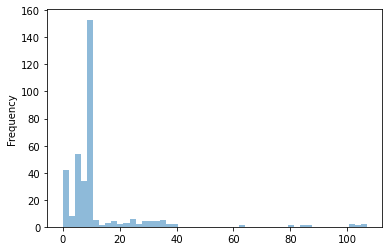

In [62]:
ax = df.duration.plot.hist(bins=50, alpha=0.5)

In [13]:
df.sort_values('duration', ascending=False)[0:30]


,packageid,title,pubdate,keywords,authors,begindate,enddate,doi,duration
90,knb-lter-jrn.210380001.740,Monthly precipitation data from a network of s...,2022,Disturbance;Disturbance;hydrology;long term ec...,"Thatcher, David;Bestelmeyer, Brandon T",1915-01-01,2021-10-01,doi:10.6073/pasta/3086f4fa60f1e0ec807c269490d4...,106.821918
78,knb-lter-jrn.210351004.2,Quadrat-based monitoring of desert grassland v...,2021,"JER;Permanent Quadrats;Study 351;""Climate, Soi...","Havstad, Kris;Christensen, Erica",1915-06-04,2020-02-07,doi:10.6073/pasta/cf6b1f5845078fbbf82053bb3594...,104.750685
87,knb-lter-jrn.210379001.80,Daily temperature and precipitation data from ...,2020,temperature;precipitation;rain;atmospheric pro...,"Wooton, Elmer;National Weather Service;Thatche...",1914-06-01,2017-10-06,doi:10.6073/pasta/f09060a9ceb136a1d40b5323aaa0...,103.419178
75,knb-lter-jrn.210351001.49,Plant Cover at Permanent Quad Locations on the...,2020,Populations;Primary Production;Land Use and La...,"Chapline, William;Havstad, Kris;Bestelmeyer, B...",1915-06-04,2016-12-15,doi:10.6073/pasta/63bfa45df4858db674bf37b52ee5...,101.602740
76,knb-lter-jrn.210351002.77,Plant Density at Permanent Quad Locations on t...,2020,Populations;Primary Production;Land Use and La...,"Chapline, William;Havstad, Kris;Bestelmeyer, B...",1915-06-04,2016-12-15,doi:10.6073/pasta/f3a7a78e1150a0f9d65956392305...,101.602740
118,knb-lter-jrn.210412001.58,Jornada Experimental Range (USDA-ARS) annual s...,2019,Plant-Animal Interactions;Management Practices...,"Havstad, Kris;Bestelmeyer, Brandon",1916-01-01,2001-12-31,doi:10.6073/pasta/c7abcca9658c05a3524f09d06462...,86.057534
88,knb-lter-jrn.210379002.61,Monthly summary temperature and precipitation ...,2020,temperature;precipitation;rain;atmospheric pro...,"Wooton, Elmer;National Weather Service;Thatche...",1914-06-01,1998-06-01,doi:10.6073/pasta/09bca98a6abe17c91be647157319...,84.057534
79,knb-lter-jrn.210365001.62,Soil movement across black grama and mesquite ...,2020,long-term;USDA;JER;CDRRC;Pasture 8B;Nautral Re...,"Campbell, Robert;Gibbens, Robert;Bestelmeyer, ...",1933-01-01,2011-12-31,doi:10.6073/pasta/b0cdd39f4ffafdd7dbdb443da6bc...,79.049315
107,knb-lter-jrn.210392001.69,Vegetation cover from line intercept transects...,2020,plant cover;canopy cover;basal area;herbivores...,"Valentine, Ken;Havstad, Kris M.;Bestelmeyer, B...",1938-01-01,2001-12-31,doi:10.6073/pasta/f86aecfbaf15833b167d7bc53275...,64.041096
121,knb-lter-jrn.210425001.75,Gap-filled daily precipitation at the 15 long-...,2020,net primary production;aboveground production;...,"Yao, Jin;Anderson, John;Savoy, Heather;Peters,...",1980-01-01,2019-12-31,doi:10.6073/pasta/cf3c45e5480551453f1f9041d664...,40.024658


In [38]:
df['prj'] = df.packageid.str.split('.', expand=True)[1].str[3:6]

In [48]:
sum(np.logical_or(df.prj=='437', df.prj=='548'))

223

In [58]:
import numpy as np
df_subset = df.loc[~np.logical_or(df.prj=='437', df.prj=='548'),:]

In [71]:
import matplotlib
import matplotlib.pyplot as plt
# Figure config
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)

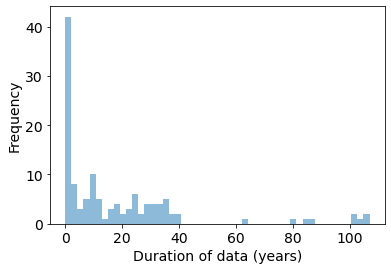

In [73]:
ax = df_subset.duration.plot.hist(bins=50, alpha=0.5)
ax.set_xlabel('Duration of data (years)')
f = ax.figure
f.savefig(os.path.expanduser(
    "~/data/GD_gmaurer@nmsu/IM/figures/JRN_EDI_durationhist_nomet_{0}.png".format(now)),
            dpi=150)

In [75]:
df_subset.duration.mean()

18.15243040212108

In [60]:
df_subset.sort_values('duration', ascending=True)[0:30]

,packageid,title,pubdate,keywords,authors,begindate,enddate,doi,duration,prj
81,knb-lter-jrn.210368002.30,Soil nutrients sampled in and around harvester...,2021,disturbance;inorganic nutrients;LTER;ants;dist...,"Di Marco, Rodolfo;Whitford, Walter G",1987-06-24,1987-06-24,doi:10.6073/pasta/7ccd11a0513cfcb98684ffb4be16...,0.000000,368
110,knb-lter-jrn.210394009.40,Surface soil nitrogen analyses under mesquite ...,2020,deserts;grasslands;shrubs;nutrients;soil chemi...,"Silva, Solange;McBride, Robin;Virginia, Ross",1986-10-01,1986-10-01,doi:10.6073/pasta/5d1ff63a4a9a9d143f22fada67d8...,0.000000,394
111,knb-lter-jrn.210395001.39,Grassland and mesquite shrubland soil nitrogen...,2020,deserts;grasslands;shrubs;nutrients;soil chemi...,"Whitford, Walt;Fisher, Fred",1986-05-12,1986-05-13,doi:10.6073/pasta/bbdc53c5f40ae9266a01e2e7937b...,0.002740,395
23,knb-lter-jrn.210015001.48,Biomass of harvested annual and perrenial forb...,2021,Land Use and Land Cover Change;Primary Product...,"Whitford, Walter G",1989-09-15,1989-09-20,doi:10.6073/pasta/fbdc3f4d6eea831088fd9bf1a794...,0.013699,015
120,knb-lter-jrn.210420002.1,Soil water and chloride concentration profiles...,2020,Inorganic Nutrients;Hydrology;Playas;playa;des...,"McKenna, Owen;Sala, Osvaldo",2014-06-02,2014-06-08,doi:10.6073/pasta/89c74d1846e012af5d4e96b21ad7...,0.016438,420
119,knb-lter-jrn.210420001.1,"Soil carbon, soil nitrogen, and geometry of 30...",2020,Inorganic Nutrients;Organic Matter;Hydrology;P...,"McKenna, Owen;Sala, Osvaldo",2012-06-20,2012-07-18,doi:10.6073/pasta/77c3a82475033285ce574d8f585e...,0.076712,420
112,knb-lter-jrn.210398001.2,Soil chemistry and nutrient distribution in lo...,2022,inorganic nutrients;primary production;distrib...,"Jarrell, Wes;Virginia, Ross;Silva, Solange;McB...",1989-06-01,1989-06-30,doi:10.6073/pasta/859012653795d19e8ec640bdfe5b...,0.079452,398
109,knb-lter-jrn.210394008.1,Surface soil analyses from a range of mesquite...,2020,deserts;grasslands;shrubs;nutrients;biogeochem...,"Silva, Solange;McBride, Robin;Virginia, Ross",1986-10-01,1986-10-30,doi:10.6073/pasta/521407e47fd64f1b6d27f6a0b4d9...,0.079452,394
82,knb-lter-jrn.210368003.38,Soil organic matter content sampled in and aro...,2021,disturbance;organic matter;LTER;ants;disturban...,"Di Marco, Rodolfo;Whitford, Walter G",1987-01-01,1987-01-31,doi:10.6073/pasta/e2de12a62e48e01a3b1df5c99c41...,0.082192,368
113,knb-lter-jrn.210398002.2,Soil chemistry and nutrient distribution in lo...,2022,inorganic nutrients;primary production;distrib...,"Jarrell, Wes;Virginia, Ross;Silva, Solange;McB...",1991-10-01,1991-10-31,doi:10.6073/pasta/330ebb1c8d27a52198fce0339b4f...,0.082192,398
